# Data Analysis and Visualization

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Summary Statistics:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.39

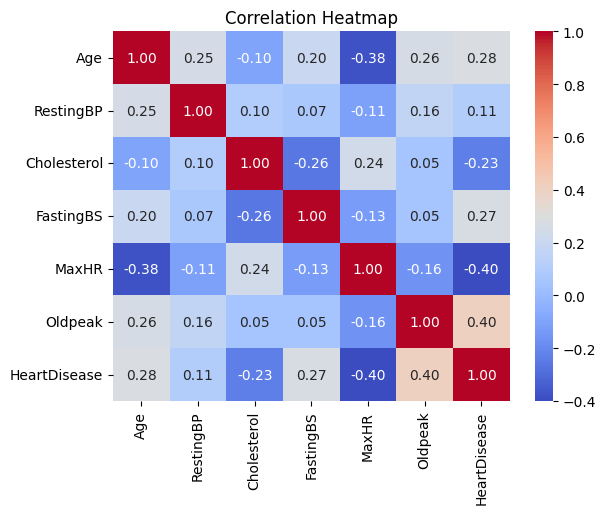

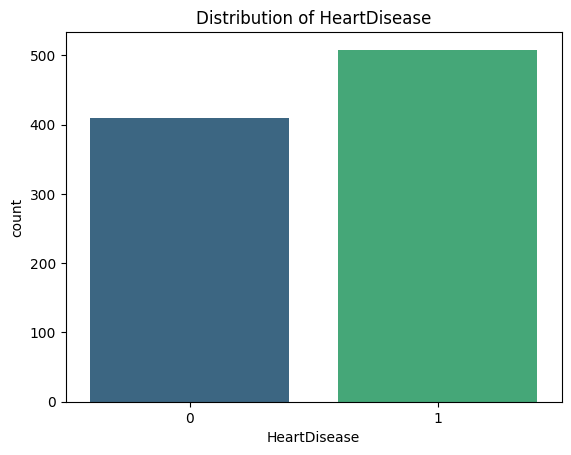

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('heart.csv')

# Overview of the data
print("Data Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Visualize correlation between numerical variables
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of target variable
sns.countplot(data=data, x='HeartDisease', hue='HeartDisease', dodge=False, palette='viridis')
plt.title("Distribution of HeartDisease")
plt.legend([], [], frameon=False)  # Remove legend since it's redundant
plt.show()


# Data Preprocessing

In [10]:
# Preprocessing pipeline
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Define preprocessing steps
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


# Train-Test Split and Model Training

In [11]:
# Define features and target
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
pipeline.fit(X_train, y_train)

# Test the model
y_pred = pipeline.predict(X_test)

# Evaluation
print("Model Evaluation:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Model Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        82
           1       0.90      0.93      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

Accuracy: 0.90


# Testing with New Data

In [12]:
new_data = pd.DataFrame({
    'Age': [55],
    'Sex': ['M'],
    'ChestPainType': ['ASY'],
    'RestingBP': [140],
    'Cholesterol': [230],
    'FastingBS': [1],
    'RestingECG': ['ST'],
    'MaxHR': [120],
    'ExerciseAngina': ['Y'],
    'Oldpeak': [2.3],
    'ST_Slope': ['Flat']
})

# Make prediction
new_prediction = pipeline.predict(new_data)
print(f"Heart Disease Prediction for new data: {new_prediction[0]}")


Heart Disease Prediction for new data: 1
